In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

## Exercício 1

Faça o plot da função logística (sigmoid) dada abaixo. Utilize um intervalo `[-5, 5]` para o eixo X.

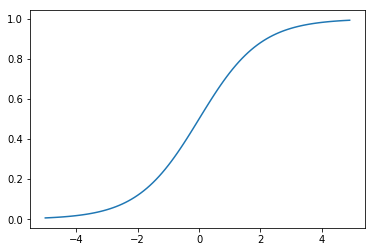

In [2]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
########################
# Inicio do seu codigo #
########################
x = np.arange(-5, 5, 0.1)
y = sigmoid(x)
plt.plot(x, y)
plt.show()

########################
#   Fim do seu codigo  #
########################

## Exercício 2

Faça o plot da função logística (sigmoid) e função ReLU dadas abaixo no mesmo gráfico. Utilize cores diferentes para os plotes e mostre as legendas. Utilize um intervalo `[-5, 5]` para o eixo X.

Documentação para legendas: [Matplotlib Legends](https://matplotlib.org/users/legend_guide.html)

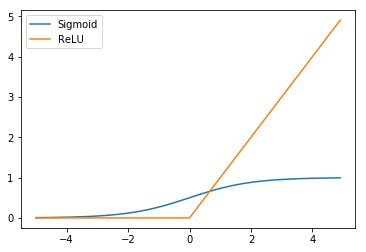

In [3]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def relu(x):
    return np.maximum(0, x)
########################
# Inicio do seu codigo #
########################
x = np.arange(-5, 5, 0.1)
y1 = sigmoid(x)
y2 = relu(x)
plt.plot(x, y1)
plt.plot(x, y2)
plt.legend(['Sigmoid', 'ReLU'])
plt.show()

########################
#   Fim do seu codigo  #
########################

## Exercício 3

1. Visualize a imagem carregada abaixo utilizando matplotlib.
2. Faça um flip horizontal da imagem e visualize o resultado.
3. Faça um flip vertical da imagem e visualize o resultado.
4. Gire a imagem em 90 graus

Shape da imagem: (250, 250, 3), dtype: uint8


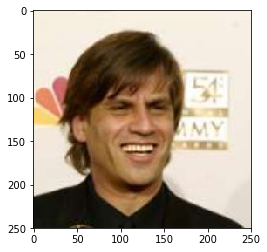

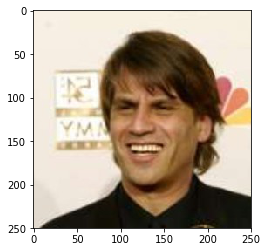

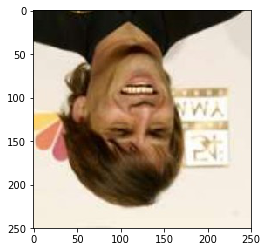

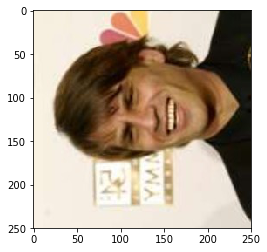

In [7]:
image = np.array(Image.open('test.jpg'))
print('Shape da imagem: {}, dtype: {}'.format(image.shape, image.dtype))
########################
# Inicio do seu codigo #
########################
plt.imshow(image)
plt.figure()
plt.imshow(image[:, ::-1, :])
plt.figure()
plt.imshow(image[::-1, :, :])
plt.figure()
plt.imshow(image.transpose(1, 0, 2))
plt.show()
########################
#   Fim do seu codigo  #
########################

## Exercício 4

Leia o arquivo csv `landmarks.csv` que contém os pontos faciais (landmarks) para a imagem que é carregada abaixo. Este arquivo é organizado da seguinte maneira:

```
x, y # para o landmark 1
x, y # para o landmark 2
x, y # para o landmark 3
..., ...
x, y # para o landmark 68
```

Após ler o arquivo, utilize matplotlib para exibir a imagem bem como os landmarks sobre a face. Experimente mudar os marcadores, bem como seus tamanhos e cores.

Shape da imagem: (250, 250, 3), dtype: uint8
Shape dos landmarks: (68, 2), dtype: float64


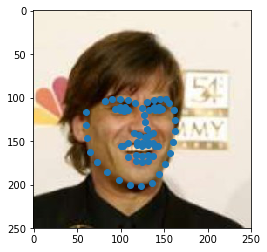

In [9]:
image = np.array(Image.open('test.jpg'))
print('Shape da imagem: {}, dtype: {}'.format(image.shape, image.dtype))
########################
# Inicio do seu codigo #
########################
landmarks = np.loadtxt('landmarks.csv', delimiter=',')
print('Shape dos landmarks: {}, dtype: {}'.format(landmarks.shape, landmarks.dtype))
plt.imshow(image)
plt.scatter(landmarks[:, 0], landmarks[:, 1])
plt.show()

########################
#   Fim do seu codigo  #
########################

## Exercício 5

Dada a imagem abaixo que contém uma face, utilize o bounding box fornecido para deixar toda a imagem preta exceto o conteúdo do bounding box. Para atribuir a cor preta a um pixel, basta atribuir o valor zero para o pixel específico em todos os canais (dimensão 2) do array (e.g. `image[0, 0, :] = 0`, atribui a cor preta ao pixel na posição`[0, 0]`).

Shape da imagem: (250, 250, 3), dtype: uint8
Coordenadas do bounding box: x1=67, y1=80, x2=175, y2=187


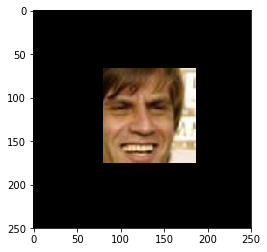

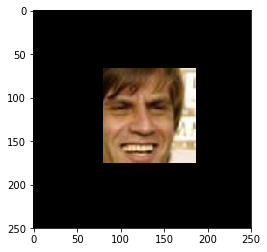

In [39]:
image = np.array(Image.open('test.jpg'))
print('Shape da imagem: {}, dtype: {}'.format(image.shape, image.dtype))
bbox = [67, 80, 175, 187] # x1, y1, x2, y2
print('Coordenadas do bounding box: x1={}, y1={}, x2={}, y2={}'.format(*bbox))
########################
# Inicio do seu codigo #
########################

# desenrolando as coordenadas
x1, y1, x2, y2 = bbox

# ----- método 1: slicing de cada um dos lados
img = np.array(image)
img[:x1, :] = 0
img[x2:, :] = 0
img[:, :y1] = 0
img[:, y2:] = 0
plt.imshow(img)
plt.show()

# ----- método 2: multiplicando por uma imagem de zeros e uns
zeros = np.zeros_like(image)
zeros[x1:x2, y1:y2] = 1

plt.figure()
plt.imshow(image * zeros)
plt.show()

########################
#   Fim do seu codigo  #
########################

## Exercício 6

Faça um gráfico de barras com o nome dos top 5 atores/atrizes por número de filmes no eixo X e o número de filmes no eixo Y. O índice dos top 5 atores/atrizes é dado no código abaixo.

Experimente mudar o critério de ordenação do top 5 para plotar outras informações.

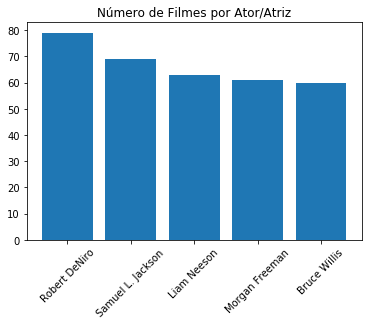

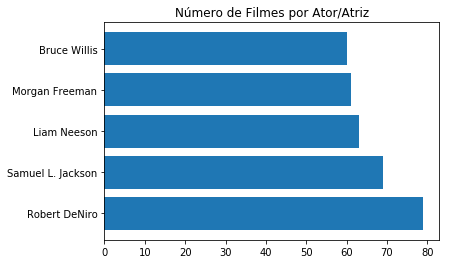

In [38]:
import csv

# estrutura para guardar os dados
dataset = {'Actor': [],
           'Total Gross': [],
           'Number of Movies': [],
           'Average per Movie': [],
           '#1 Movie': [],
           'Gross': []}

with open('actors.csv', 'r') as f:
    arquivo_csv = csv.reader(f, delimiter=',', quotechar='"')
    for i, row in enumerate(arquivo_csv):
        # pulando o header
        if i == 0:
            continue
        # parsing
        dataset['Actor'].append(row[0])
        dataset['Total Gross'].append(float(row[1]))
        dataset['Number of Movies'].append(int(row[2]))
        dataset['Average per Movie'].append(float(row[3]))
        dataset['#1 Movie'].append(row[4])
        dataset['Gross'].append(float(row[5]))

# convertendo tudo para np arrays
for k in dataset.keys():
    dataset[k] = np.array(dataset[k])

criterio = 'Number of Movies'
indice_top_5 = np.argsort(dataset[criterio])[::-1][:5]
########################
# Inicio do seu codigo #
########################

atores = []
numero_filmes = []
for indice in indice_top_5:
    atores.append(dataset['Actor'][indice])
    numero_filmes.append(dataset['Number of Movies'][indice])

# vertical
plt.title('Número de Filmes por Ator/Atriz')
plt.bar(atores, numero_filmes)
plt.xticks(rotation=45)
plt.show()

# horizontal
plt.figure()
plt.title('Número de Filmes por Ator/Atriz')
plt.barh(atores, numero_filmes)
plt.show()

########################
#   Fim do seu codigo  #
########################